In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib
import netCDF4 as nc

In [3]:
print(np.linspace(1, 10, 10)) # 1부터 10까지 10개로 균등하게 나눔

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [12]:
import netCDF4 as nc
path = "D:/Repositories/too_much_big_data/"
fn = 'sst.day.mean.ltm.1991-2020.nc'
fn2 = 'AQUA_MODIS.20020704_20250630.L3m.CU.CHL.chlor_a.4km.nc'
fname = path + fn
fname2 = path + fn2
fdata = nc.Dataset(fname)
fdata2 = nc.Dataset(fname2)

fdata

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.5
    title: NOAA High-resolution Blended Analysis: Daily Values using AVHRR only
    institution: NOAA/NCDC
    source: NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment: Reynolds, et al., 2007: Daily High-Resolution-Blended Analyses for Sea Surface Temperature. J. Climate, 20, 5473-5496.  Climatology is based on 1971-2000 OI.v2 SST, Satellite data: Navy NOAA17 NOAA18 AVHRR, Ice data: NCEP ice.
    history: Created 2021/05/27 by doDayLTMNC4
    dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
    References: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
    not_missing_threshold_percent: minimum 3% values input to have non-missing output value
    dimensions(sizes): lon(1440), lat(720), time(365), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float64 climatology_bounds(t

In [13]:
fdata2

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    product_name: AQUA_MODIS.20020704_20250630.L3m.CU.CHL.chlor_a.4km.nc
    instrument: MODIS
    title: MODISA Level-3 Standard Mapped Image
    project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
    platform: Aqua
    source: satellite observations from MODIS-Aqua
    temporal_range: 23-year
    processing_version: R2022.0.2
    date_created: 2025-08-03T21:47:09.000Z
    history: l3mapgen par=AQUA_MODIS.20020704_20250630.L3m.CU.CHL.chlor_a.4km.nc.param 
    l2_flag_names: ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT
    time_coverage_start: 2002-07-04T00:40:00.000Z
    time_coverage_end: 2025-07-01T02:44:59.000Z
    start_orbit_number: 885
    end_orbit_number: 123203
    map_projection: Equidistant Cylindrical
    latitude_units: degrees_north
    longitude_units: degrees_east
    northernmost_latitude: 90.0
  

In [14]:
chlor_a = fdata2['chlor_a'][:]
lat_c = fdata2['lat'][:].data
lon_c = fdata2['lon'][:].data

print(f'chlor_a : {chlor_a.shape}')
chlor_a

chlor_a : (4320, 8640)


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-32767.0,
  dtype=float32)

In [ ]:
lat = fdata['lat'][:].data # 위도
lon = fdata['lon'][:].data # 경도
time = fdata['time'][:] # 시간
sst = fdata['sst'][:] # sst data

sst


masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.7339999675750732, -1.7369999885559082, -1.7383333444595337,
          ..., -1.7383333444595337, -1.7379999160766602,
          -1.7346665859222412],
         [-1.7393332719802856, -1.74399995803833, -1.746999979019165,
          ..., -1.747333288192749, -1.7453333139419556,
          -1.7396667003631592],
         [-1.7493332624435425, -1.7493332624435425, -1.7493332624435425,
          ..., -1.7489999532699585, -1.7489999532699585,
          -1.7493332624435425]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.7350000143051147, -1.7369999885559082, -1.7393332719802856,
          ..., -1.7389999628067017, -1.7379999160766602,
          -1.7353333234786987],
         [-1.7393332719802856, -1.744333267211914, -1.747666597366333,
 

In [9]:
print(f'sst : {sst.shape}')
print(f'lat : {lat.shape}')
print(f'lon : {lon.shape}')
print(f'time : {time.shape}')


sst : (365, 720, 1440)
lat : (720,)
lon : (1440,)
time : (365,)


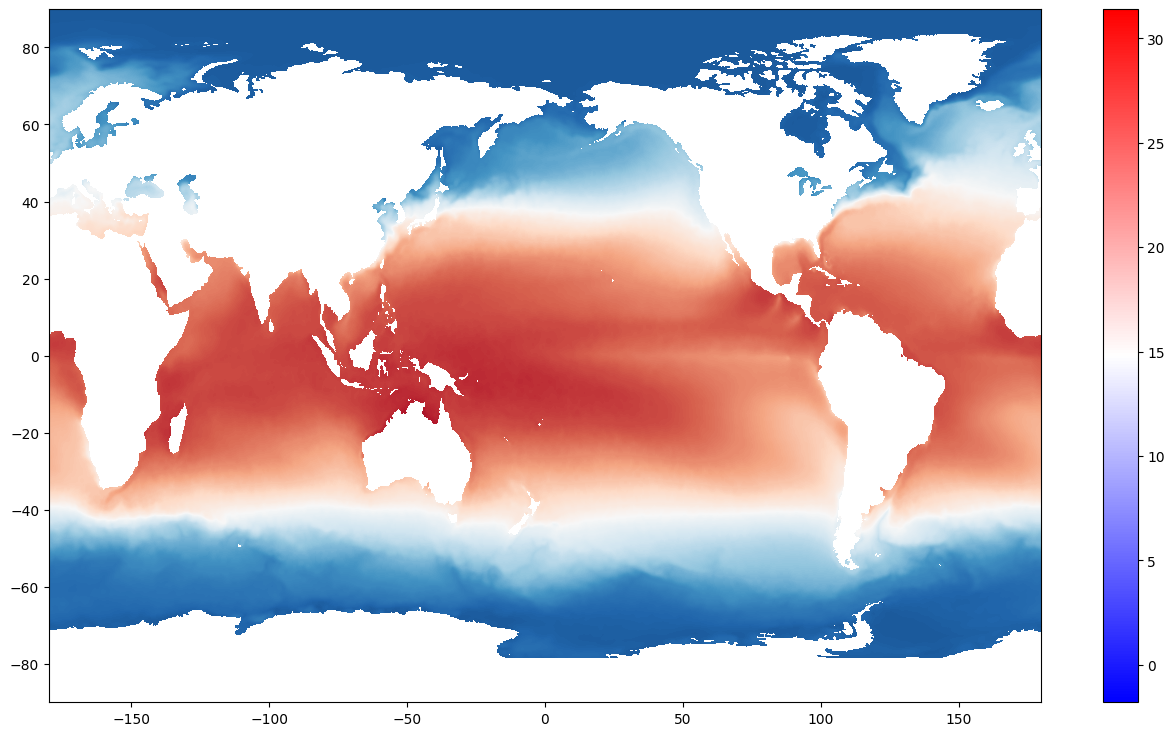

In [ ]:

fig=plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
vmax = sst[0].max()
vmin = sst[0].min()
cmap = cm.bwr
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
colormapping = cm.ScalarMappable(norm=norm, cmap=cmap)
# plt.colorbar(ax)
cbar = fig.colorbar(colormapping, ax=plt.gca())

cont = ax.contourf(lon-180, lat, sst[0], levels=300, cmap="RdBu_r", vmin=-5, vmax=35)